# Setting up our Environment

In [ ]:
!pip3 install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!aws configure 

In [ ]:
# Splitting the date intro train and testr
#https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified

!pip install split-folders

import splitfolders
splitfolders.ratio('path', output="output", seed=1337, ratio=(.8,0,0.2)) 

#pair the data using regex keep 1000 images for testing. 

In [12]:
!pip install tensorflow
!pip install keras==2.4.3
!pip install git+https://www.github.com/keras-team/keras-contrib.git

     |████████████████████████████████| 244.3 MB 3.6 kB/s eta 0:00:01    |██▊                             | 20.5 MB 1.3 MB/s eta 0:02:52
     |████████████████████████████████| 980 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 1.7 MB/s eta 0:00:01
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
     |████████████████████████████████| 6.0 MB 2.5 MB/s eta 0:00:01     |███████████████████████████████ | 5.8 MB 2.5 MB/s eta 0:00:01
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 65 kB 929 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.1 MB/s eta 0:00:01
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
     |████████████████████████████████| 1.6 MB 2.2 MB/s eta 0:00:01
  Using cached libclang-15.0.6.1-py2.py3-none-macosx_10_9_x86_64.whl (25.0 MB)
     |████████████████████████████████| 3.5 MB 1.8 MB/s eta 0:

## Importing libraries

In [ ]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
from numpy import savez_compressed
from tqdm import tqdm
import os

In [14]:
def load_images(path, size=(400,400)):
  data_list = list()
  # enumerate filenames in directory, assume all are images
  for filename in tqdm(listdir(path)):
  # load and resize the image
    pixels = load_img(os.path.join(path,filename), target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # store
    data_list.append(pixels)

  return asarray(data_list)

## Code to Convert Images to Numpy array and use CycleGan

# Problems that we might face :  1 ) RAM crashing 2 ) resized image too small.  



In [3]:
import os
path=os.listdir('data/PS-RGB')
arr=set()
for file in path:
   name = file.split("PS-RGB_")[1]
   arr.add(name)
   print(file)
# print(arr)

path=os.listdir('data/SAR-Intensity')
arr2=set()
for file in path:
   name = file.split("SAR-Intensity_")[1]
   
   arr2.add(name)
    
print((arr.intersection(arr2)))

SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822102956_20190822103254_tile_4111.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804143251_20190804143533_tile_335.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804115720_20190804115941_tile_9555.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822093552_20190822093843_tile_9654.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823144405_20190823144711_tile_3345.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822102956_20190822103254_tile_4105.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822143107_20190822143418_tile_1549.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823152057_20190823152354_tile_1273.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823072627_20190823072925_tile_10492.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822154325_20190822154559_tile_9327.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822100114_20190822100413_tile_668.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823152057_20190823152354_tile_1267.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823072627_20190823072925_t

SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804113009_20190804113242_tile_4806.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804121908_20190804122131_tile_6678.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822160641_20190822160923_tile_4055.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822160641_20190822160923_tile_4041.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822090458_20190822090745_tile_6612.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822133830_20190822134118_tile_3772.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804142736_20190804142950_tile_1162.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823134629_20190823134924_tile_8244.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823080717_20190823081024_tile_3064.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804133131_20190804133356_tile_785.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823080717_20190823081024_tile_3058.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190822080151_20190822080440_tile_618.tif
SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804143846_20190804144102_ti

{'20190822134835_20190822135131_tile_4486.tif', '20190822071501_20190822071737_tile_6715.tif', '20190822152811_20190822153054_tile_2.tif', '20190822141600_20190822141831_tile_8900.tif', '20190822084703_20190822085003_tile_1380.tif', '20190804145216_20190804145445_tile_6520.tif', '20190822101929_20190822102224_tile_10371.tif', '20190822142505_20190822142747_tile_6831.tif', '20190822155502_20190822155747_tile_4644.tif', '20190822154658_20190822154950_tile_9395.tif', '20190822142017_20190822142316_tile_9285.tif', '20190822133333_20190822133635_tile_7766.tif', '20190804130422_20190804130643_tile_3177.tif', '20190822153558_20190822153835_tile_2533.tif', '20190804111224_20190804111453_tile_8683.tif', '20190822102956_20190822103254_tile_4111.tif', '20190822065725_20190822065959_tile_7283.tif', '20190822090458_20190822090745_tile_6618.tif', '20190822100114_20190822100413_tile_663.tif', '20190822094509_20190822094813_tile_167.tif', '20190822073257_20190822073557_tile_2422.tif', '20190822145028_

------------------------------------------


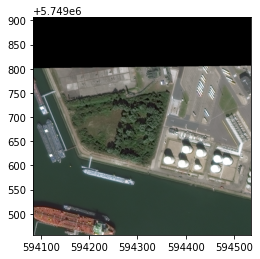

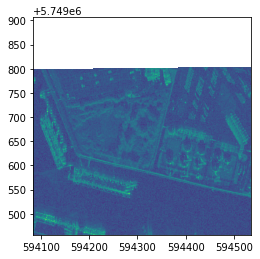

------------------------------------------


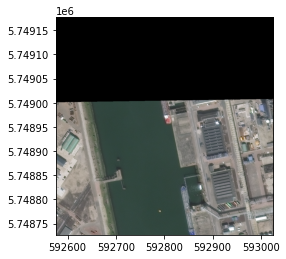

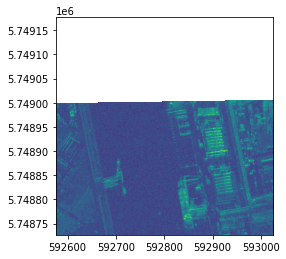

------------------------------------------


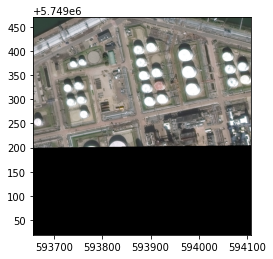

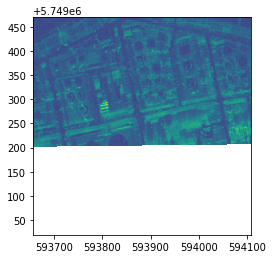

------------------------------------------


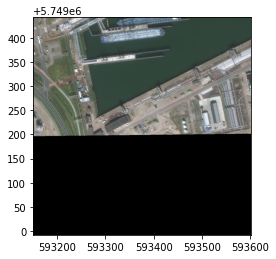

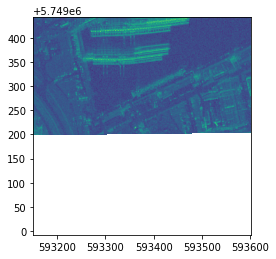

------------------------------------------


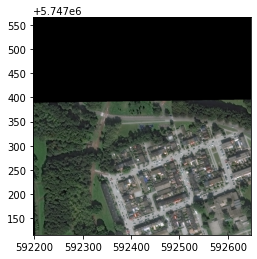

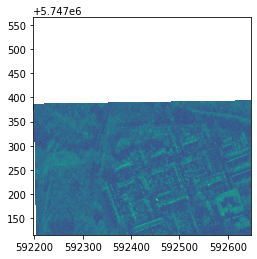

------------------------------------------


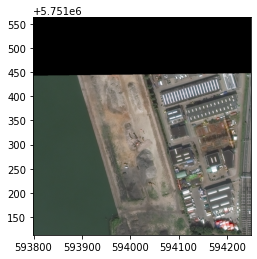

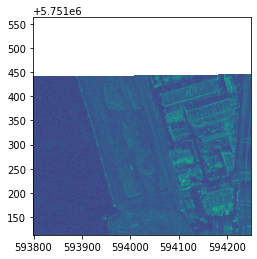

------------------------------------------


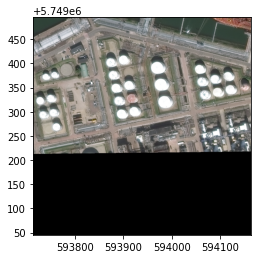

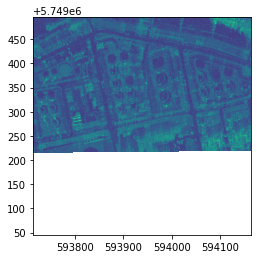

------------------------------------------


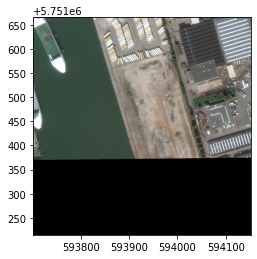

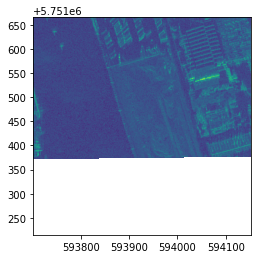

------------------------------------------


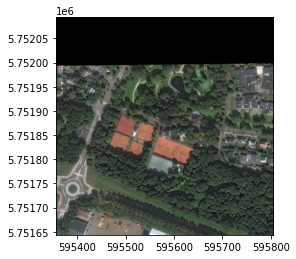

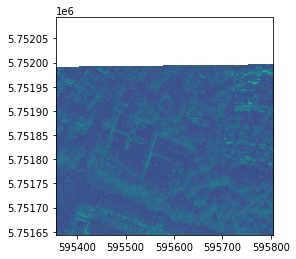

------------------------------------------


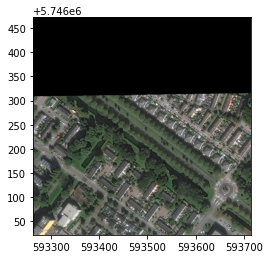

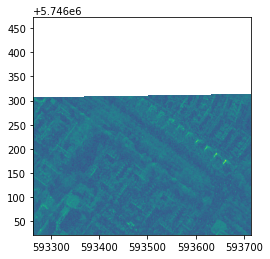

------------------------------------------


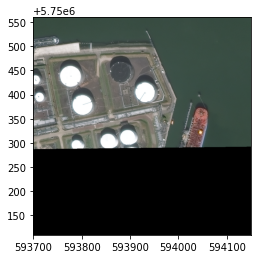

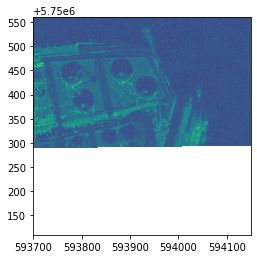

------------------------------------------


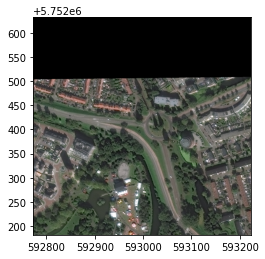

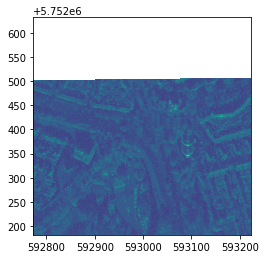

------------------------------------------


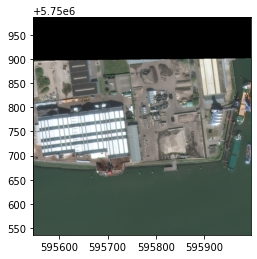

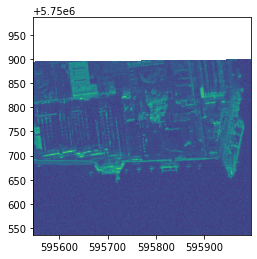

------------------------------------------


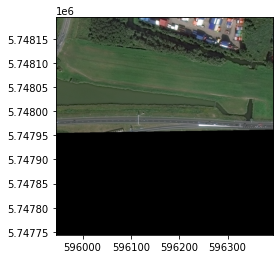

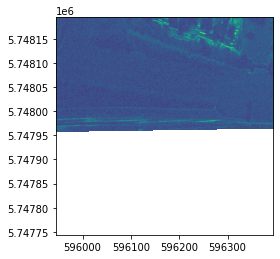

------------------------------------------


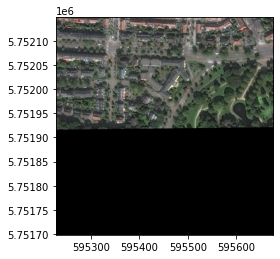

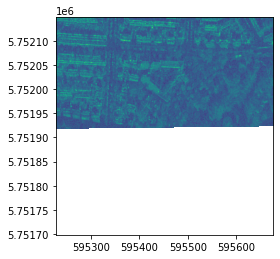

------------------------------------------


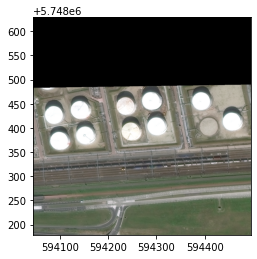

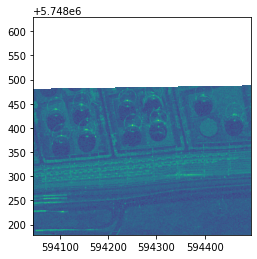

------------------------------------------


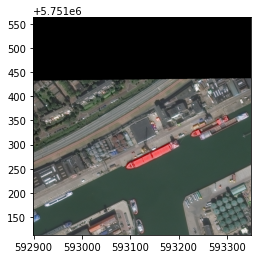

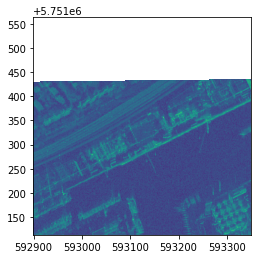

------------------------------------------


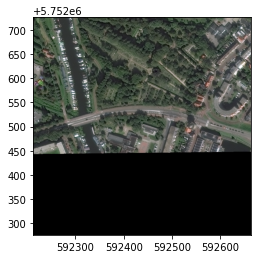

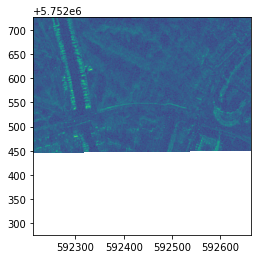

------------------------------------------


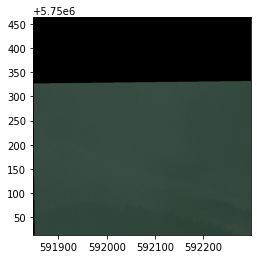

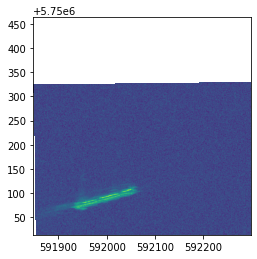

------------------------------------------


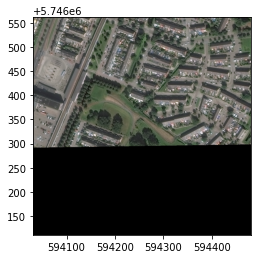

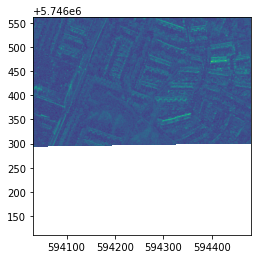

In [174]:
from rasterio.plot import show

for i in list(arr.intersection(arr2))[:20]:
    print('------------------------------------------')
    with rasterio.open('data/PS-RGB/SN6_Train_AOI_11_Rotterdam_PS-RGB_'+i) as src:
        sar_img = src.read() # numpy format
        show(src)
    with rasterio.open('data/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_'+i) as src:
        sar_img = src.read() # numpy format
        show(src)


------------------------------------------


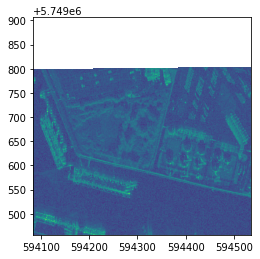

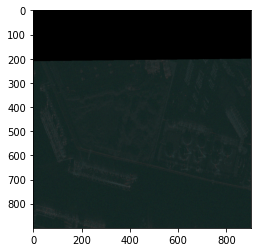

In [183]:
from rasterio.plot import show
import matplotlib.pyplot as plott

for i in list(arr.intersection(arr2))[:1]:
    print('------------------------------------------')
#     with rasterio.open('data/PS-RGB/SN6_Train_AOI_11_Rotterdam_PS-RGB_'+i) as src:
#         img = src.read() # numpy format
# #         show(src)
#         plott.imshow(img)
    with rasterio.open('data/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_'+i) as src:
#         sar_img = src.read() # numpy format
        show(src)
        img_data = src.read(
          out_shape=(
            src.count,
            900,
            900
          ),
          resampling=Resampling.bilinear
        )
        img_data = img_data[:3]
        img_data = np.moveaxis(img_data, 0,-1) 
        plott.imshow(img_data.astype('uint8'))
        


## Code to Convert Images to Numpy array and use CycleGan

### Problems that we might face :  
- RAM crashing 
- resized image too small.  



In [19]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
from numpy import savez_compressed
 
# load all images in a directory into memory
def load_images(path, size=(256,256)):
 data_list = list()
 # enumerate filenames in directory, assume all are images
 for filename in listdir(path):
 # load and resize the image
     pixels = load_img(path + filename, target_size=size)
     # convert to numpy array
     pixels = img_to_array(pixels)
     # store
     data_list.append(pixels)
 return asarray(data_list)
 
# dataset path
path = 'output/'
# load dataset A
dataA1 = load_images(path + 'train/PS-RGB/')
dataAB = load_images(path + 'test/PS-RGB/')
dataA = vstack((dataA1, dataAB))
print('Loaded dataA: ', dataA.shape)
# load dataset B
dataB1 = load_images(path + 'train/SAR-Intensity/')
dataB2 = load_images(path + 'test/SAR-Intensity/')
dataB = vstack((dataB1, dataB2))
print('Loaded dataB: ', dataB.shape)
# save as compressed numpy array
filename = 's2o_400.npz'    #this might crash
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

ModuleNotFoundError: No module named 'keras_preprocessing'

In [ ]:
optical_train = load_images()

### Functions to load images

In [ ]:
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('horse2zebra_256.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + i)
 pyplot.axis('off')
 pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + n_samples + i)
 pyplot.axis('off')
 pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

#rest from this : https://machinelearningmastery.com/cyclegan-tutorial-with-keras/

In [74]:
import rasterio
from rasterio.enums import Resampling
upscale_factor=1/2

def load_images_sar(path, size=(400,400)):
  data_list = list()
  # enumerate filenames in directory, assume all are images
  for filename in tqdm(listdir(path)):
  # load and resize the image
    try:
        with rasterio.open(os.path.join(path,filename)) as src:
            img_data = src.read(
              out_shape=(
                src.count,
                256,
                256
              ),
              resampling=Resampling.bilinear
            ) 
            img_data = img_data[:3]
            # reshape the array to (256, 256, 3)
            img_data = img_data.reshape((256, 256, 3))
    #         return arr
    #             break
            data_list.append(img_data)
    except:
       print(path)
       pass
  return asarray(data_list)
  

In [75]:

from os import listdir   
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
import numpy as np

# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)


# dataset path
path = 'output/'

# load dataset A - Monet paintings
dataA_all = load_images_sar(path + 'train/SAR-Intensity/')
print('Loaded dataA: ', dataA_all.shape)

from sklearn.utils import resample
#To get a subset of all images, for faster training during demonstration
dataA = resample(dataA_all, 
                 replace=False,     
                 n_samples=500,    
                 random_state=42) 

# load dataset B - Photos 
dataB_all = load_images(path + 'train/PS-RGB/')
print('Loaded dataB: ', dataB_all.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management. 
dataB = resample(dataB_all, 
                 replace=False,     
                 n_samples=500,    
                 random_state=42) 



 23%|█████████▎                               | 126/556 [00:08<00:34, 12.53it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 3346 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073257_20190822073557_tile_2434.tif.9F821fF3, band 1: IReadBlock failed at X offset 0, Y offset 145: TIFFReadEncodedStrip() failed.
 23%|█████████▌                               | 129/556 [00:08<00:30, 13.98it/s]

output/train/SAR-Intensity/


 34%|█████████████▊                           | 187/556 [00:12<00:29, 12.41it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 0 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073746_20190822074042_tile_5373.tif.41bDE1CC, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.
 34%|██████████████                           | 190/556 [00:12<00:25, 14.27it/s]

output/train/SAR-Intensity/


 47%|███████████████████▏                     | 260/556 [00:18<00:22, 13.26it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 0 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073257_20190822073557_tile_2431.tif.bA0b504e, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.
 47%|███████████████████▍                     | 263/556 [00:18<00:19, 15.27it/s]

output/train/SAR-Intensity/


 57%|███████████████████████▏                 | 315/556 [00:22<00:16, 14.64it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 8530 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073257_20190822073557_tile_2429.tif.1CC03dA5, band 1: IReadBlock failed at X offset 0, Y offset 156: TIFFReadEncodedStrip() failed.
 57%|███████████████████████▍                 | 318/556 [00:22<00:15, 15.54it/s]

output/train/SAR-Intensity/


 84%|██████████████████████████████████▌      | 468/556 [00:34<00:07, 11.81it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 3986 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073257_20190822073557_tile_2432.tif.90fEF43B, band 1: IReadBlock failed at X offset 0, Y offset 327: TIFFReadEncodedStrip() failed.
 85%|██████████████████████████████████▊      | 472/556 [00:34<00:06, 12.38it/s]

output/train/SAR-Intensity/


 95%|███████████████████████████████████████  | 530/556 [00:39<00:02, 11.89it/s]ERROR 1: TIFFReadEncodedStrip:Read error at scanline 4294967295; got 0 bytes, expected 14400
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: output/train/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190822073257_20190822073557_tile_2433.tif.992eD31c, band 1: IReadBlock failed at X offset 0, Y offset 0: TIFFReadEncodedStrip() failed.
 96%|███████████████████████████████████████▎ | 533/556 [00:40<00:01, 13.44it/s]

output/train/SAR-Intensity/


100%|█████████████████████████████████████████| 556/556 [00:42<00:00, 13.11it/s]


Loaded dataA:  (550, 256, 256, 3)
Loaded dataB:  (2720, 256, 256, 3)


In [193]:
# plot source images
# n_samples = 3
# for i in range(n_samples):
# 	plt.subplot(2, n_samples, 1 + i)
# 	plt.axis('off')
# 	plt.imshow(dataA[i].astype('uint8'))
# plot target image
# for i in range(n_samples):
# 	plt.subplot(2, n_samples, 1 + n_samples + i)
# 	plt.axis('off')
# 	plt.imshow(dataB[i].astype('uint8'))
# plt.show()


# reduce data

# load image data
data = [dataA, dataB]



print('Loaded', data[0].shape, data[1].shape,len(data))


Loaded (500, 256, 256, 3) (500, 256, 256, 3) 2


## Allternative approach (without constructing npz)


In [77]:
keras
#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
	# load compressed arrays
	# unpack arrays
	X1, X2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

dataset = preprocess_data(data)

# from cycleGAN_model import define_generator, define_discriminator, define_composite_model, train
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
print(image_shape)
# generator: A -> B ps->sar
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

from datetime import datetime 
start1 = datetime.now() 
# train models


(256, 256, 3)


In [ ]:
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset, epochs=5)

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Iteration>1, dA[0.291,0.078] dB[0.146,0.158] g[14.153,16.398]
>Saved: g_model_AtoB_000001.h5 and g_model_BtoA_000001.h5
Iteration>2, dA[0.160,0.061] dB[0.140,0.158] g[12.914,15.270]
Iteration>3, dA[0.151,0.069] dB[0.232,0.151] g[10.545,13.063]
Iteration>4, dA[0.123,0.047] dB[0.061,0.113] g[15.109,16.014]
Iteration>5, dA[0.073,0.087] dB[0.189,0.103] g[11.385,13.783]
Iteration>6, dA[0.066,0.044] dB[0.072,0.184] g[14.816,16.117]
>Saved: g_model_AtoB_000006.h5 and g_model_BtoA_000006.h5
Iteration>7, dA[0.070,0.051] dB[0.159,0.110] g[15.041,16.540]
Iteration>8, dA[0.151,0.044] dB[0.114,0.140] g[12.770,14.472]
Iteration>9, dA[0.241,0.048] dB[0.132,0.103] g[12.586,14.461]
Iteration>10, dA[0.295,0.101] dB[0.174,0.165] g[11.257,13.511]
Iteration>11, dA[0.222,0.106] dB[0.062,0.105] g[12.105,14.718]
>Saved: g_model_AtoB_000011.h5 and g_model_BtoA_000011.h5
Iteration>12, dA[0.192,0.085] dB[0.187,0.130] g[13.979,15.379]
Iteration>13, dA[0.264,0.059] dB[0.146,0.145] g[13.363,15.216]
Iteration>14, dA

In [ ]:
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

## Model Architecture

In [191]:
# https://youtu.be/VzIO5_R9XEM
# https://youtu.be/2MSGnkir9ew
"""
cycleGAN model

Based on the code by Jason Brownlee from his blogs on https://machinelearningmastery.com/
I am adapting his code to various applications but original credit goes to Jason. 

The model uses instance normalization layer:
Normalize the activations of the previous layer at each step,
i.e. applies a transformation that maintains the mean activation
close to 0 and the activation standard deviation close to 1.
Standardizes values on each output feature map rather than across features in a batch. ​

Download instance normalization code from here: https://github.com/keras-team/keras-contrib/blob/master/keras_contrib/layers/normalization/instancenormalization.py
Or install keras_contrib using guidelines here: https://github.com/keras-team/keras-contrib 
"""


from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
#from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

#Download instance norm. code from the link above.
#Or install keras_contrib using guidelines here: https://github.com/keras-team/keras-contrib 
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

from matplotlib import pyplot

# discriminator model (70x70 patchGAN)
# C64-C128-C256-C512
#After the last layer, conv to 1-dimensional output, followed by a Sigmoid function.  
# The “axis” argument is set to -1 for instance norm. to ensure that features are normalized per feature map.
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64: 4x4 kernel Stride 2x2
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128: 4x4 kernel Stride 2x2
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256: 4x4 kernel Stride 2x2
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512: 4x4 kernel Stride 2x2 
    # Not in the original paper. Comment this block if you want.
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer : 4x4 kernel but Stride 1x1
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
    #The model is trained with a batch size of one image and Adam opt. 
    #with a small learning rate and 0.5 beta. 
    #The loss for the discriminator is weighted by 50% for each model update.
    #This slows down changes to the discriminator relative to the generator model during training.
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

# generator a resnet block to be used in the generator
# residual block that contains two 3 × 3 convolutional layers with the same number of filters on both layers.
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

# define the  generator model - encoder-decoder type architecture

#c7s1-k denote a 7×7 Convolution-InstanceNorm-ReLU layer with k filters and stride 1. 
#dk denotes a 3 × 3 Convolution-InstanceNorm-ReLU layer with k filters and stride 2.
# Rk denotes a residual block that contains two 3 × 3 convolutional layers
# uk denotes a 3 × 3 fractional-strided-Convolution InstanceNorm-ReLU layer with k filters and stride 1/2

#The network with 6 residual blocks consists of:
#c7s1-64,d128,d256,R256,R256,R256,R256,R256,R256,u128,u64,c7s1-3

#The network with 9 residual blocks consists of:
#c7s1-64,d128,d256,R256,R256,R256,R256,R256,R256,R256,R256,R256,u128, u64,c7s1-3


#----  generator was here

# define a composite model for updating generators by adversarial and cycle loss
#We define a composite model that will be used to train each generator separately. 
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# Make the generator of interest trainable as we will be updating these weights.
    #by keeping other models constant.
    #Remember that we use this same function to train both generators,
    #one generator at a time. 
	g_model_1.trainable = True
	# mark discriminator and second generator as non-trainable
	d_model.trainable = False
	g_model_2.trainable = False
    
	# adversarial loss
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity loss
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# cycle loss - forward
	output_f = g_model_2(gen1_out)
	# cycle loss - backward
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
    
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	
    # define the optimizer
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], 
               loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
#Remember that for real images the label (y) is 1. 
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

# generate a batch of images, returns images and targets
#Remember that for fake images the label (y) is 0. 
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake images
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# periodically save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = 'g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = 'g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# periodically generate images using the save model and plot input and output images
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	# save plot to file
	filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig(filename1)
	pyplot.close()

# update image pool for fake images to reduce model oscillation
# update discriminators using a history of generated images 
#rather than the ones produced by the latest generators.
#Original paper recommended keeping an image buffer that stores 
#the 50 previously created images.

def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset, epochs=1):
	# define properties of the training run
	n_epochs, n_batch, = epochs, 1  #batch size fixed to 1 as suggested in the paper
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fake images
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
    
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples from each domain (A and B)
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples using both B to A and A to B generators.
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fake images in the pool. Remember that the paper suggstes a buffer of 50 images
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
        
		# update generator B->A via the composite model
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		
        # update generator A->B via the composite model
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		
        # summarize performance
        #Since our batch size =1, the number of iterations would be same as the size of our dataset.
        #In one epoch you'd have iterations equal to the number of images.
        #If you have 100 images then 1 epoch would be 100 iterations
		print('Iteration>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance periodically
        #If batch size (total images)=100, performance will be summarized after every 75th iteration.
		if (i) % (5) == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i) % ( 5) == 0:
			# save the models
            # #If batch size (total images)=100, model will be saved after 
            #every 75th iteration x 5 = 375 iterations.
			save_models(i, g_model_AtoB, g_model_BtoA)


In [ ]:



# Use the saved cyclegan models for image translation
from instancenormalization import InstanceNormalization  
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
A_data = resample(dataA_all, 
                 replace=False,     
                 n_samples=50,    
                 random_state=42) # reproducible results

B_data = resample(dataB_all, 
                 replace=False,     
                 n_samples=50,    
                 random_state=42) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5


# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('monet2photo_models/g_model_AtoB_005935.h5', cust)
model_BtoA = load_model('monet2photo_models/g_model_BtoA_005935.h5', cust)

# plot A->B->A (Monet to photo to Monet)
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B (Photo to Monet to Photo)
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

##########################
#Load a single custom image
test_image = load_img('')
test_image = img_to_array(test_image)
test_image_input = np.array([test_image])  # Convert single image to a batch.
test_image_input = (test_image_input - 127.5) / 127.5

# plot B->A->B (Photo to Monet to Photo),
monet_generated  = model_BtoA.predict(test_image_input)
photo_reconstructed = model_AtoB.predict(monet_generated)
show_plot(test_image_input, monet_generated, photo_reconstructed)
'''

----
